In [1]:
!pip install yfinance
!pip install alive-progress
!pip install networkx

# Network Analysis with Python (networkx) - Who owns the DOW JONES Industrial Average Equity Index?

In [2]:
from IPython.display import YouTubeVideo

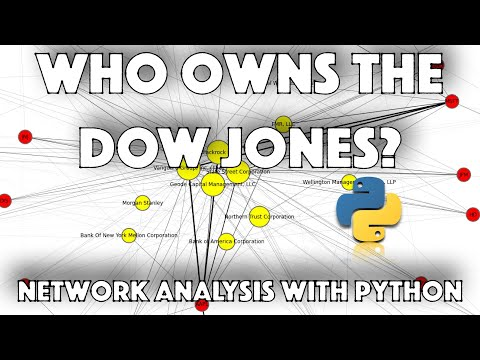

In [3]:
YouTubeVideo("x6PNcuZk83g")

###  Import Libraries

In [4]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
import yfinance as yf
from alive_progress import alive_bar
import time

In [5]:
var1 = yf.Ticker("AAPL")

In [6]:
var1

yfinance.Ticker object <AAPL>

In [7]:
apple =var1.institutional_holders

In [8]:
apple

Holder      Shares Date Reported   % Out  \
0           Vanguard Group, Inc. (The)  1261261357    2021-12-30  0.0773   
1                       Blackrock Inc.  1019810291    2021-12-30  0.0625   
2              Berkshire Hathaway, Inc   887135554    2021-12-30  0.0544   
3             State Street Corporation   633115246    2021-12-30  0.0388   
4                             FMR, LLC   352204129    2021-12-30  0.0216   
5        Geode Capital Management, LLC   264351901    2021-12-30  0.0162   
6        Price (T.Rowe) Associates Inc   223148792    2021-12-30  0.0137   
7           Northern Trust Corporation   190876014    2021-12-30  0.0117   
8  Bank Of New York Mellon Corporation   144695935    2021-12-30  0.0089   
9    Norges Bank Investment Management   142076403    2021-12-30  0.0087   

          Value  
0  223962179162  
1  181087713372  
2  157528660323  
3  112422274232  
4   62540887186  
5   46940967060  
6   39624530995  
7   33893853805  
8   25693657177  
9   25228506880

In [9]:
apple['comp'] = var1.ticker

In [10]:
apple

Holder      Shares Date Reported   % Out  \
0           Vanguard Group, Inc. (The)  1261261357    2021-12-30  0.0773   
1                       Blackrock Inc.  1019810291    2021-12-30  0.0625   
2              Berkshire Hathaway, Inc   887135554    2021-12-30  0.0544   
3             State Street Corporation   633115246    2021-12-30  0.0388   
4                             FMR, LLC   352204129    2021-12-30  0.0216   
5        Geode Capital Management, LLC   264351901    2021-12-30  0.0162   
6        Price (T.Rowe) Associates Inc   223148792    2021-12-30  0.0137   
7           Northern Trust Corporation   190876014    2021-12-30  0.0117   
8  Bank Of New York Mellon Corporation   144695935    2021-12-30  0.0089   
9    Norges Bank Investment Management   142076403    2021-12-30  0.0087   

          Value  comp  
0  223962179162  AAPL  
1  181087713372  AAPL  
2  157528660323  AAPL  
3  112422274232  AAPL  
4   62540887186  AAPL  
5   46940967060  AAPL  
6   39624530995  AAPL  
7   33893853805  AAPL  
8   25693657177  AAPL  
9   25228506880  AAPL

In [11]:
var2 = yf.Ticker("MSFT")

In [12]:
msft = var2.institutional_holders

In [13]:
msft["comp"] = var2.ticker

In [14]:
msft

Holder     Shares Date Reported   % Out  \
0         Vanguard Group, Inc. (The)  615950062    2021-12-30  0.0824   
1                     Blackrock Inc.  519035634    2021-12-30  0.0694   
2           State Street Corporation  302541869    2021-12-30  0.0405   
3                           FMR, LLC  215377233    2021-12-30  0.0288   
4      Price (T.Rowe) Associates Inc  204196901    2021-12-30  0.0273   
5      Geode Capital Management, LLC  129107118    2021-12-30  0.0173   
6            Capital World Investors  107717797    2021-12-30  0.0144   
7  Capital Research Global Investors   92868182    2021-12-30  0.0124   
8    Capital International Investors   90985531    2021-12-30  0.0122   
9         Northern Trust Corporation   88410999    2021-12-30  0.0118   

          Value  comp  
0  207156324851  MSFT  
1  174562064426  MSFT  
2  101750881382  MSFT  
3   72435671002  MSFT  
4   68675501744  MSFT  
5   43421305925  MSFT  
6   36227649487  MSFT  
7   31233426970  MSFT  
8   30600253785  MSFT  
9   29734387183  MSFT

In [15]:
tog_ = pd.concat([apple,msft])

In [16]:
G = nx.from_pandas_edgelist(tog_,'Holder','comp') #G = nx.from_pandas_edgelist(dataframe,source,target) 

In [17]:
G.nodes

NodeView(('Vanguard Group, Inc. (The)', 'AAPL', 'Blackrock Inc.', 'Berkshire Hathaway, Inc', 'State Street Corporation', 'FMR, LLC', 'Geode Capital Management, LLC', 'Price (T.Rowe) Associates Inc', 'Northern Trust Corporation', 'Bank Of New York Mellon Corporation', 'Norges Bank Investment Management', 'MSFT', 'Capital World Investors', 'Capital Research Global Investors', 'Capital International Investors'))

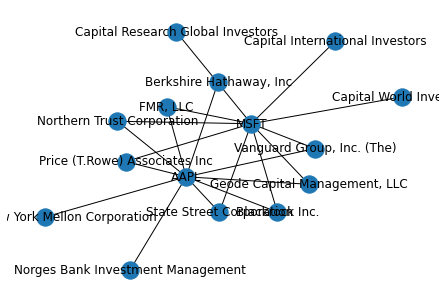

In [18]:
nx.draw(G,with_labels=True)

In [19]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [20]:
tickers

Company Exchange Symbol                        Industry  \
0                         3M     NYSE    MMM                    Conglomerate   
1           American Express     NYSE    AXP              Financial services   
2                      Amgen   NASDAQ   AMGN               Biopharmaceutical   
3                      Apple   NASDAQ   AAPL          Information technology   
4                     Boeing     NYSE     BA           Aerospace and defense   
5                Caterpillar     NYSE    CAT         Construction and Mining   
6                    Chevron     NYSE    CVX              Petroleum industry   
7                      Cisco   NASDAQ   CSCO          Information technology   
8                  Coca-Cola     NYSE     KO                  Drink industry   
9                     Disney     NYSE    DIS  Broadcasting and entertainment   
10                       Dow     NYSE    DOW               Chemical industry   
11             Goldman Sachs     NYSE     GS              Financial services   
12                Home Depot     NYSE     HD                Home Improvement   
13                 Honeywell   NASDAQ    HON                    Conglomerate   
14                       IBM     NYSE    IBM          Information technology   
15                     Intel   NASDAQ   INTC          Semiconductor industry   
16         Johnson & Johnson     NYSE    JNJ         Pharmaceutical industry   
17            JPMorgan Chase     NYSE    JPM              Financial services   
18                McDonald's     NYSE    MCD                   Food industry   
19                     Merck     NYSE    MRK         Pharmaceutical industry   
20                 Microsoft   NASDAQ   MSFT          Information technology   
21                      Nike     NYSE    NKE               Clothing industry   
22          Procter & Gamble     NYSE     PG      Fast-moving consumer goods   
23                Salesforce     NYSE    CRM          Information technology   
24                 Travelers     NYSE    TRV                       Insurance   
25              UnitedHealth     NYSE    UNH             Managed health care   
26                   Verizon     NYSE     VZ     Telecommunications industry   
27                      Visa     NYSE      V              Financial services   
28  Walgreens Boots Alliance   NASDAQ    WBA                       Retailing   
29                   Walmart     NYSE    WMT                       Retailing   

    Date added                                              Notes  \
0   1976-08-09              As Minnesota Mining and Manufacturing   
1   1982-08-30                                                NaN   
2   2020-08-31                                                NaN   
3   2015-03-19                                                NaN   
4   1987-03-12                                                NaN   
5   1991-05-06                                                NaN   
6   2008-02-19                      Also 1930-07-18 to 1999-11-01   
7   2009-06-08                                                NaN   
8   1987-03-12                      Also 1932-05-26 to 1935-11-20   
9   1991-05-06                                                NaN   
10  2019-04-02                                                NaN   
11  2013-09-20                                                NaN   
12  1999-11-01                                                NaN   
13  2020-08-31  Also 1925-12-07 to 2008-02-19 under various na...   
14  1979-06-29                      Also 1932-05-26 to 1939-03-04   
15  1999-11-01                                                NaN   
16  1997-03-17                                                NaN   
17  1991-05-06                                                NaN   
18  1985-10-30                                                NaN   
19  1979-06-29                                                NaN   
20  1999-11-01                                                NaN   
21  2013-09-20        

In [21]:
tickers=tickers.Symbol.to_list()

In [22]:
tickers

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT']

In [23]:
frames = []
with alive_bar(len(tickers),force_tty = True) as bar:
    for ticker in tickers:
        var = yf.Ticker(ticker)
        frame = var.institutional_holders
        frame['comp'] = var.ticker
        frames.append(frame)
        bar()

|████████████████████████████████████████| 30/30 [100%] in 10:47.7 (0.05/s)                                             


In [24]:
all_tog = pd.concat(frames)

In [25]:
all_tog

Holder    Shares Date Reported  \
0                   Vanguard Group, Inc. (The)  50240763    2021-12-30   
1                               Blackrock Inc.  41810186    2021-12-30   
2                     State Street Corporation  30979936    2021-12-30   
3                Geode Capital Management, LLC  10780080    2021-12-30   
4   Charles Schwab Investment Management, Inc.  10557291    2021-12-30   
..                                         ...       ...           ...   
5                   Northern Trust Corporation  16607064    2021-12-30   
6                               Morgan Stanley  15580922    2021-12-30   
7            Norges Bank Investment Management  15012238    2020-12-30   
8    State Farm Mutual Automobile Insurance Co  13083050    2021-12-30   
9                Price (T.Rowe) Associates Inc  11843039    2021-12-30   

     % Out       Value comp  
0   0.0883  8924266731  MMM  
1   0.0735  7426743339  MMM  
2   0.0544  5502966031  MMM  
3   0.0189  1914865610  MMM  
4   0.0185  1875291600  MMM  
..     ...         ...  ...  
5   0.0060  2402876090  WMT  
6   0.0056  2254403604  WMT  
7   0.0054  2164014107  WMT  
8   0.0047  1892986504  WMT  
9   0.0043  1713569312  WMT  

[300 rows x 6 columns]

In [26]:
G = nx.from_pandas_edgelist(all_tog,"Holder","comp")

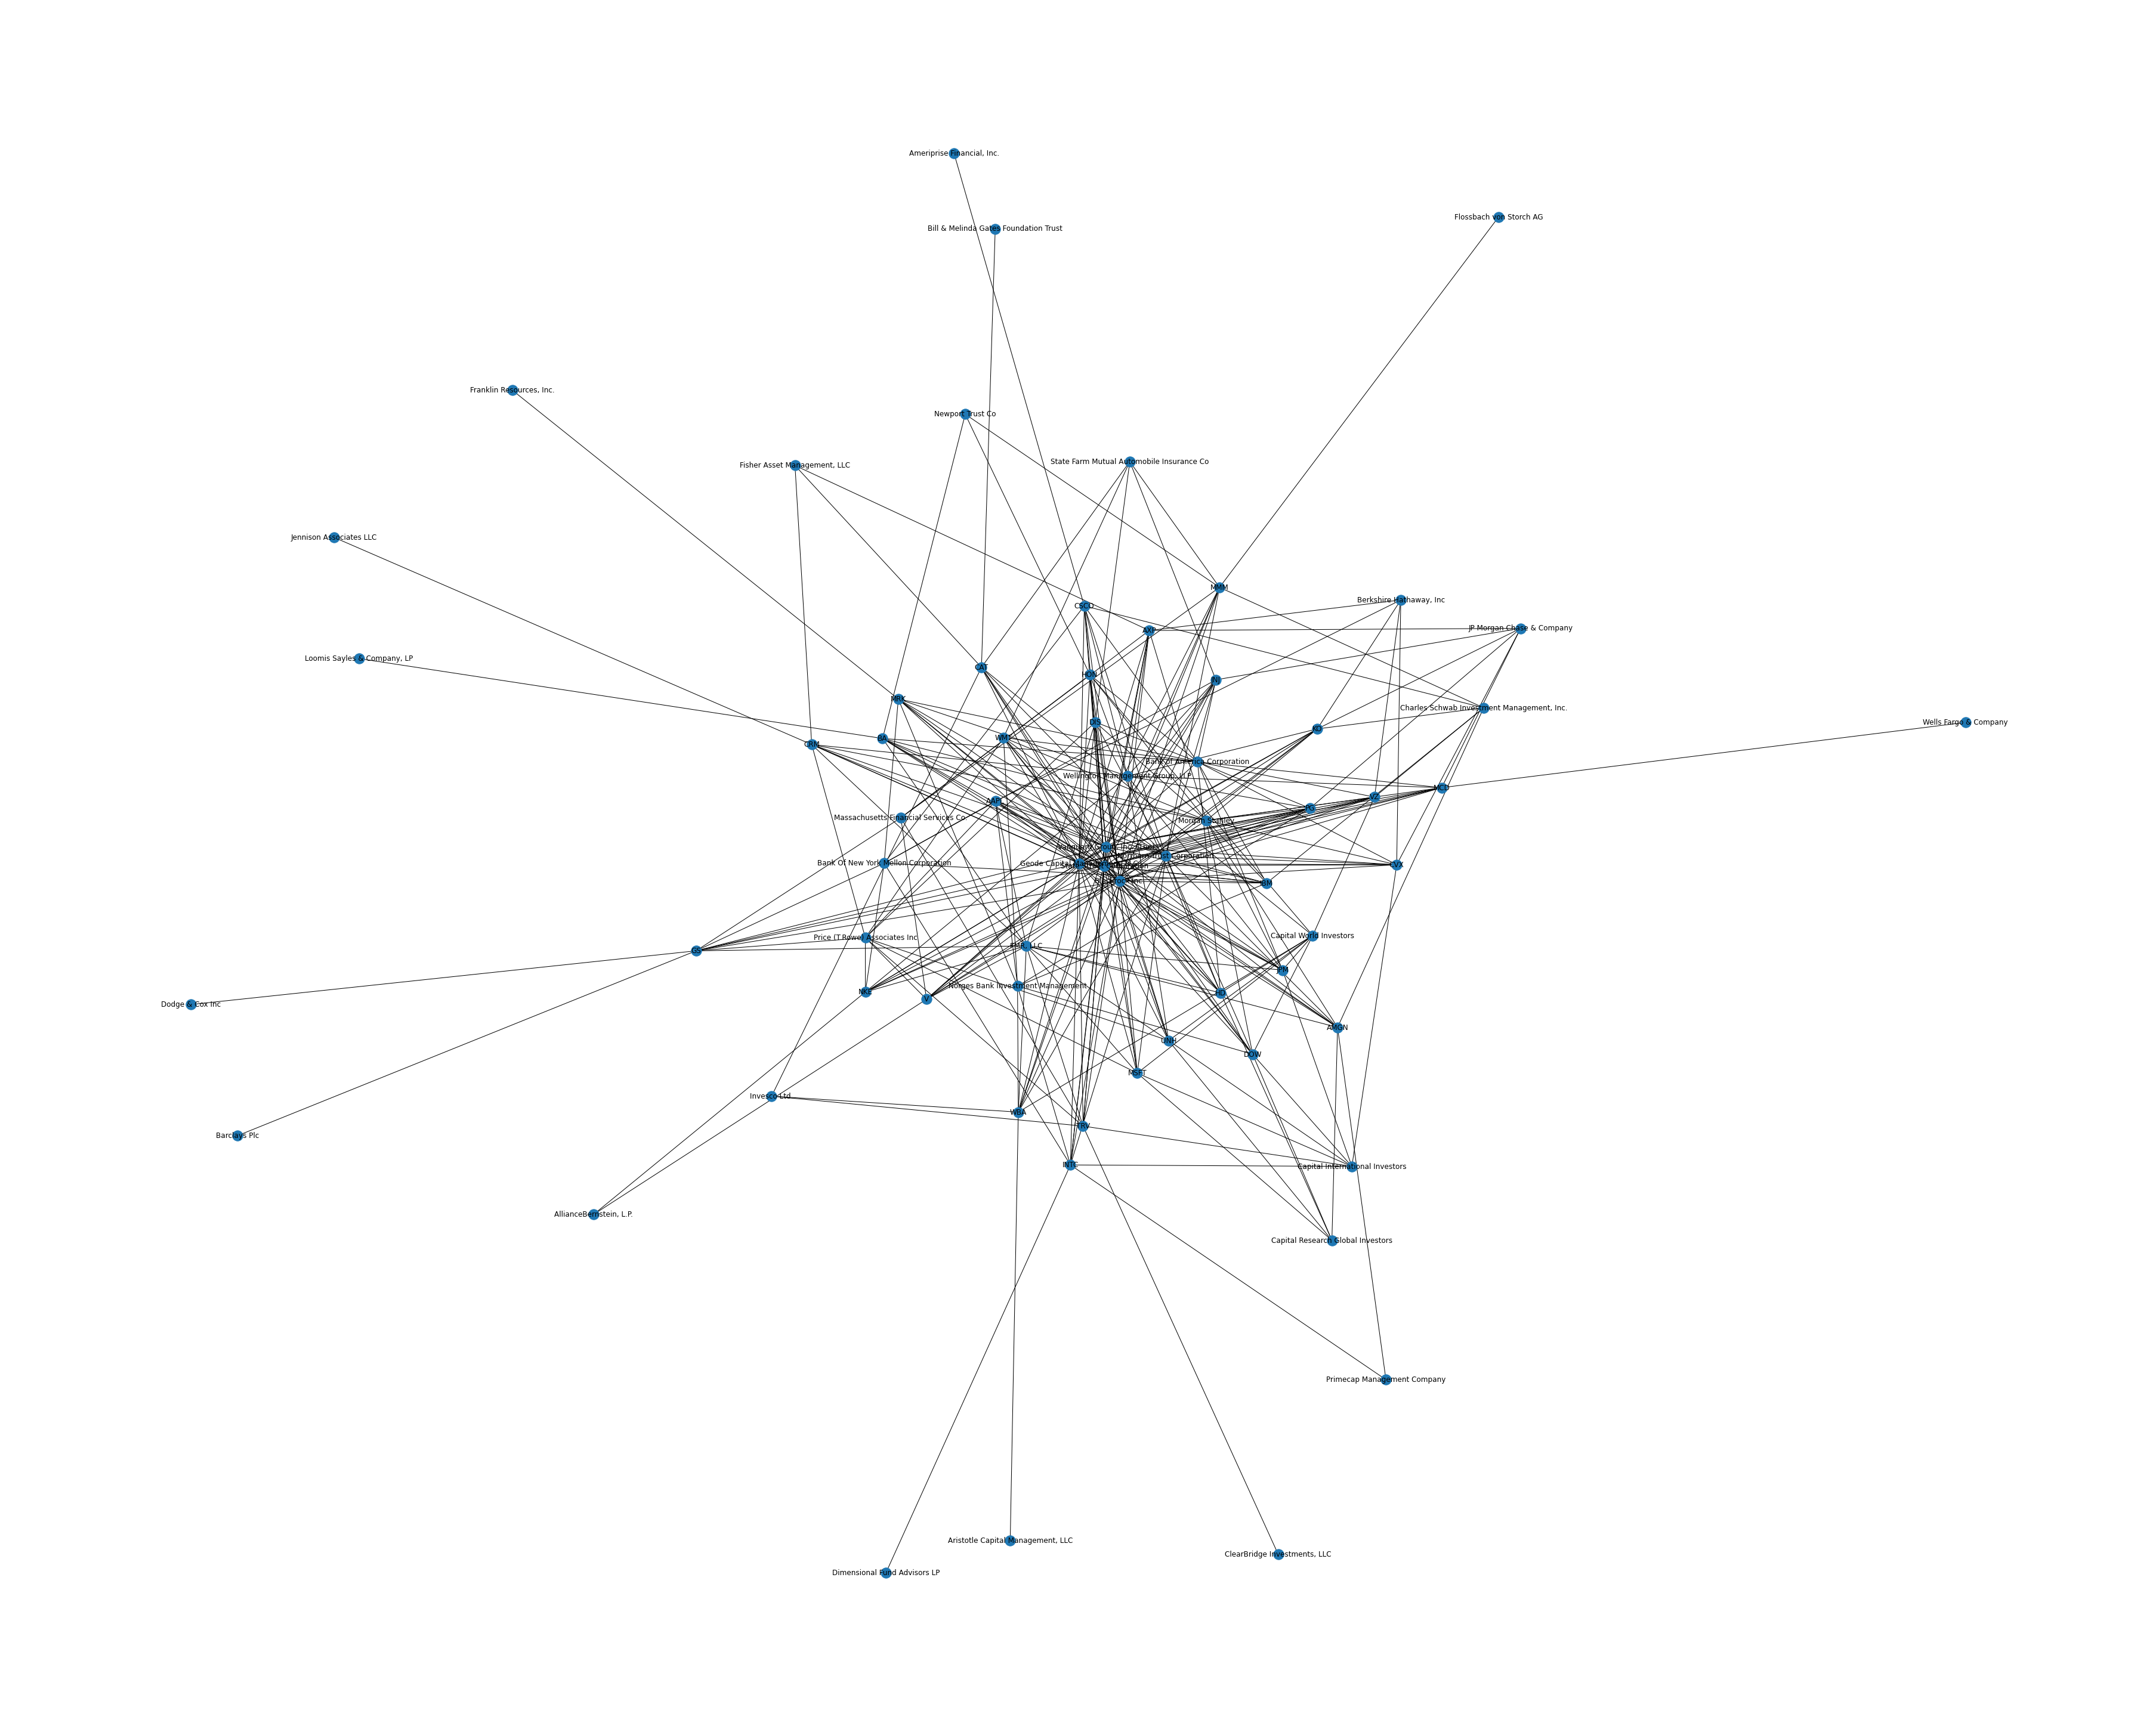

In [27]:
plt.figure(figsize = (50,40))
nx.draw(G,with_labels= True)

In [28]:
colors = []

for node in G:
    if node in all_tog["comp"].values:
        colors.append("red")
    else:
        colors.append("yellow")

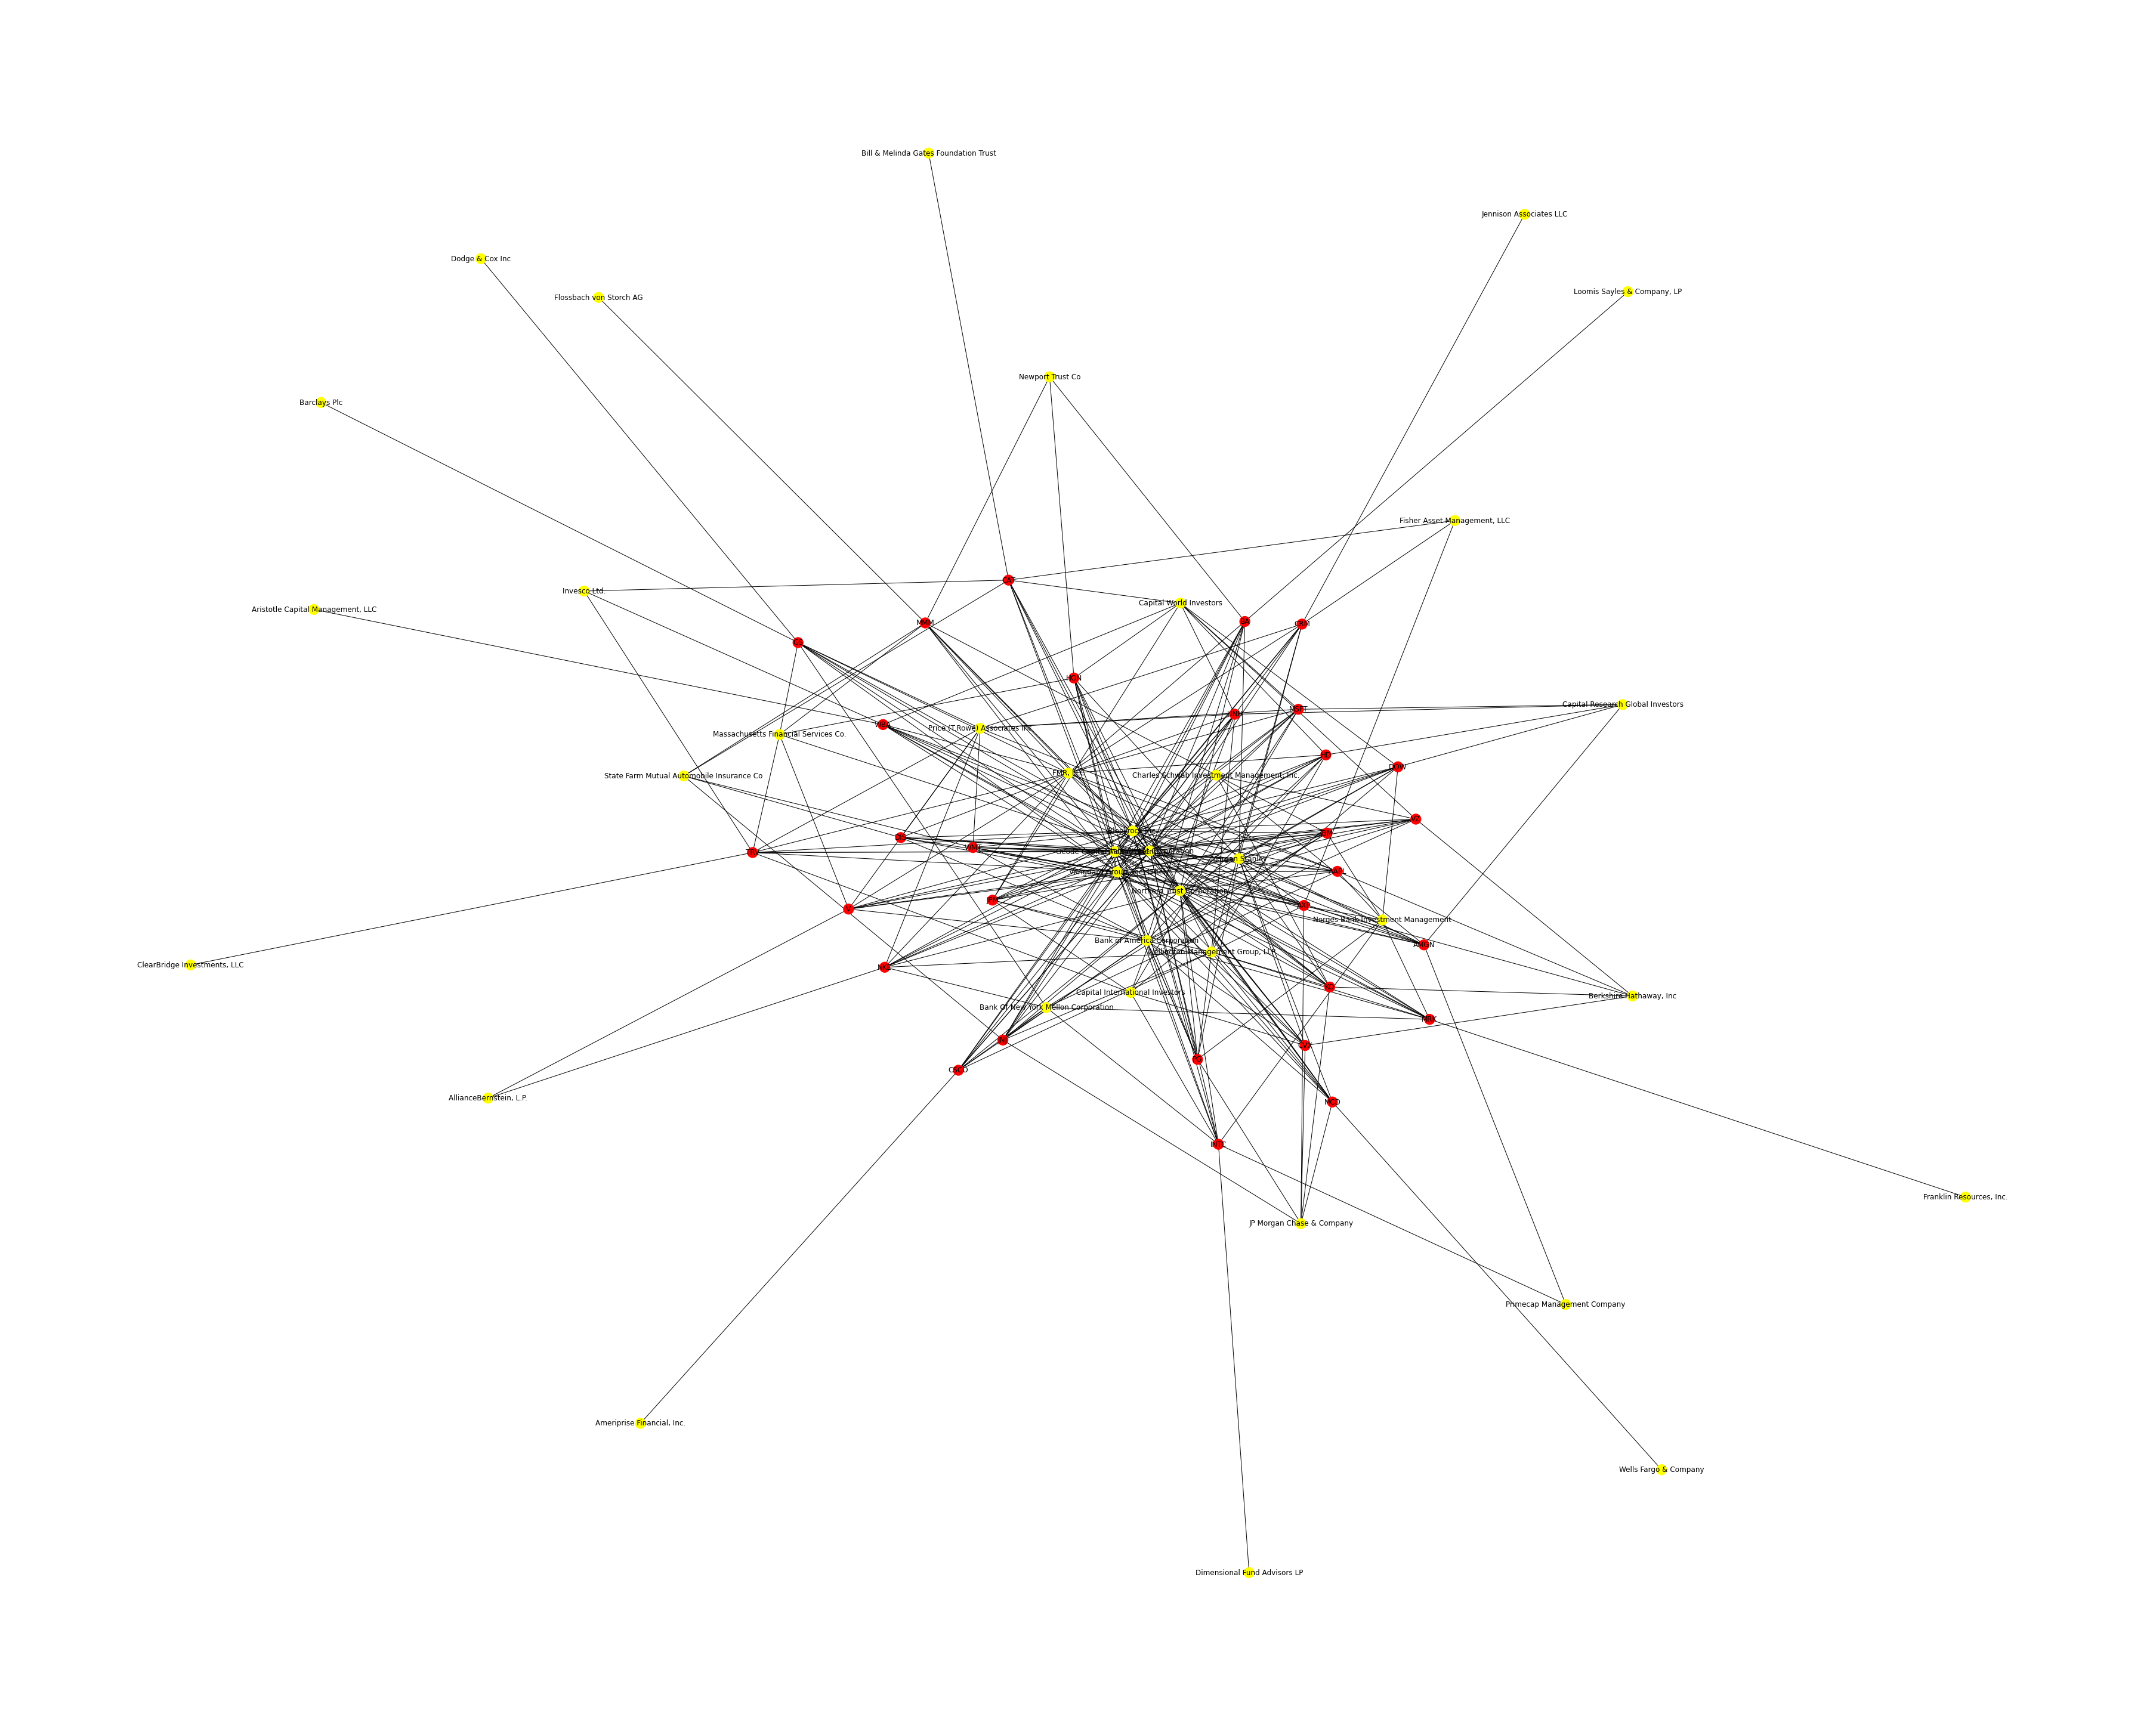

In [29]:
plt.figure(figsize = (50,40))
nx.draw(G,with_labels= True,node_color=colors)

In [30]:
G.degree()

DegreeView({'Vanguard Group, Inc. (The)': 30, 'MMM': 10, 'Blackrock Inc.': 30, 'State Street Corporation': 30, 'Geode Capital Management, LLC': 30, 'Charles Schwab Investment Management, Inc.': 6, 'Newport Trust Co': 3, 'State Farm Mutual Automobile Insurance Co': 5, 'Flossbach von Storch AG': 1, 'Northern Trust Corporation': 21, 'Massachusetts Financial Services Co.': 6, 'Berkshire Hathaway, Inc': 5, 'AXP': 10, 'Wellington Management Group, LLP': 13, 'Fisher Asset Management, LLC': 3, 'JP Morgan Chase & Company': 6, 'Morgan Stanley': 16, 'AMGN': 10, 'Capital Research Global Investors': 5, 'Primecap Management Company': 2, 'FMR, LLC': 15, 'AAPL': 10, 'Price (T.Rowe) Associates Inc': 10, 'Bank Of New York Mellon Corporation': 8, 'Norges Bank Investment Management': 8, 'BA': 10, 'Loomis Sayles & Company, LP': 1, 'Bank of America Corporation': 15, 'CAT': 10, 'Capital World Investors': 9, 'Bill & Melinda Gates Foundation Trust': 1, 'Invesco Ltd.': 3, 'CVX': 10, 'Capital International Inves

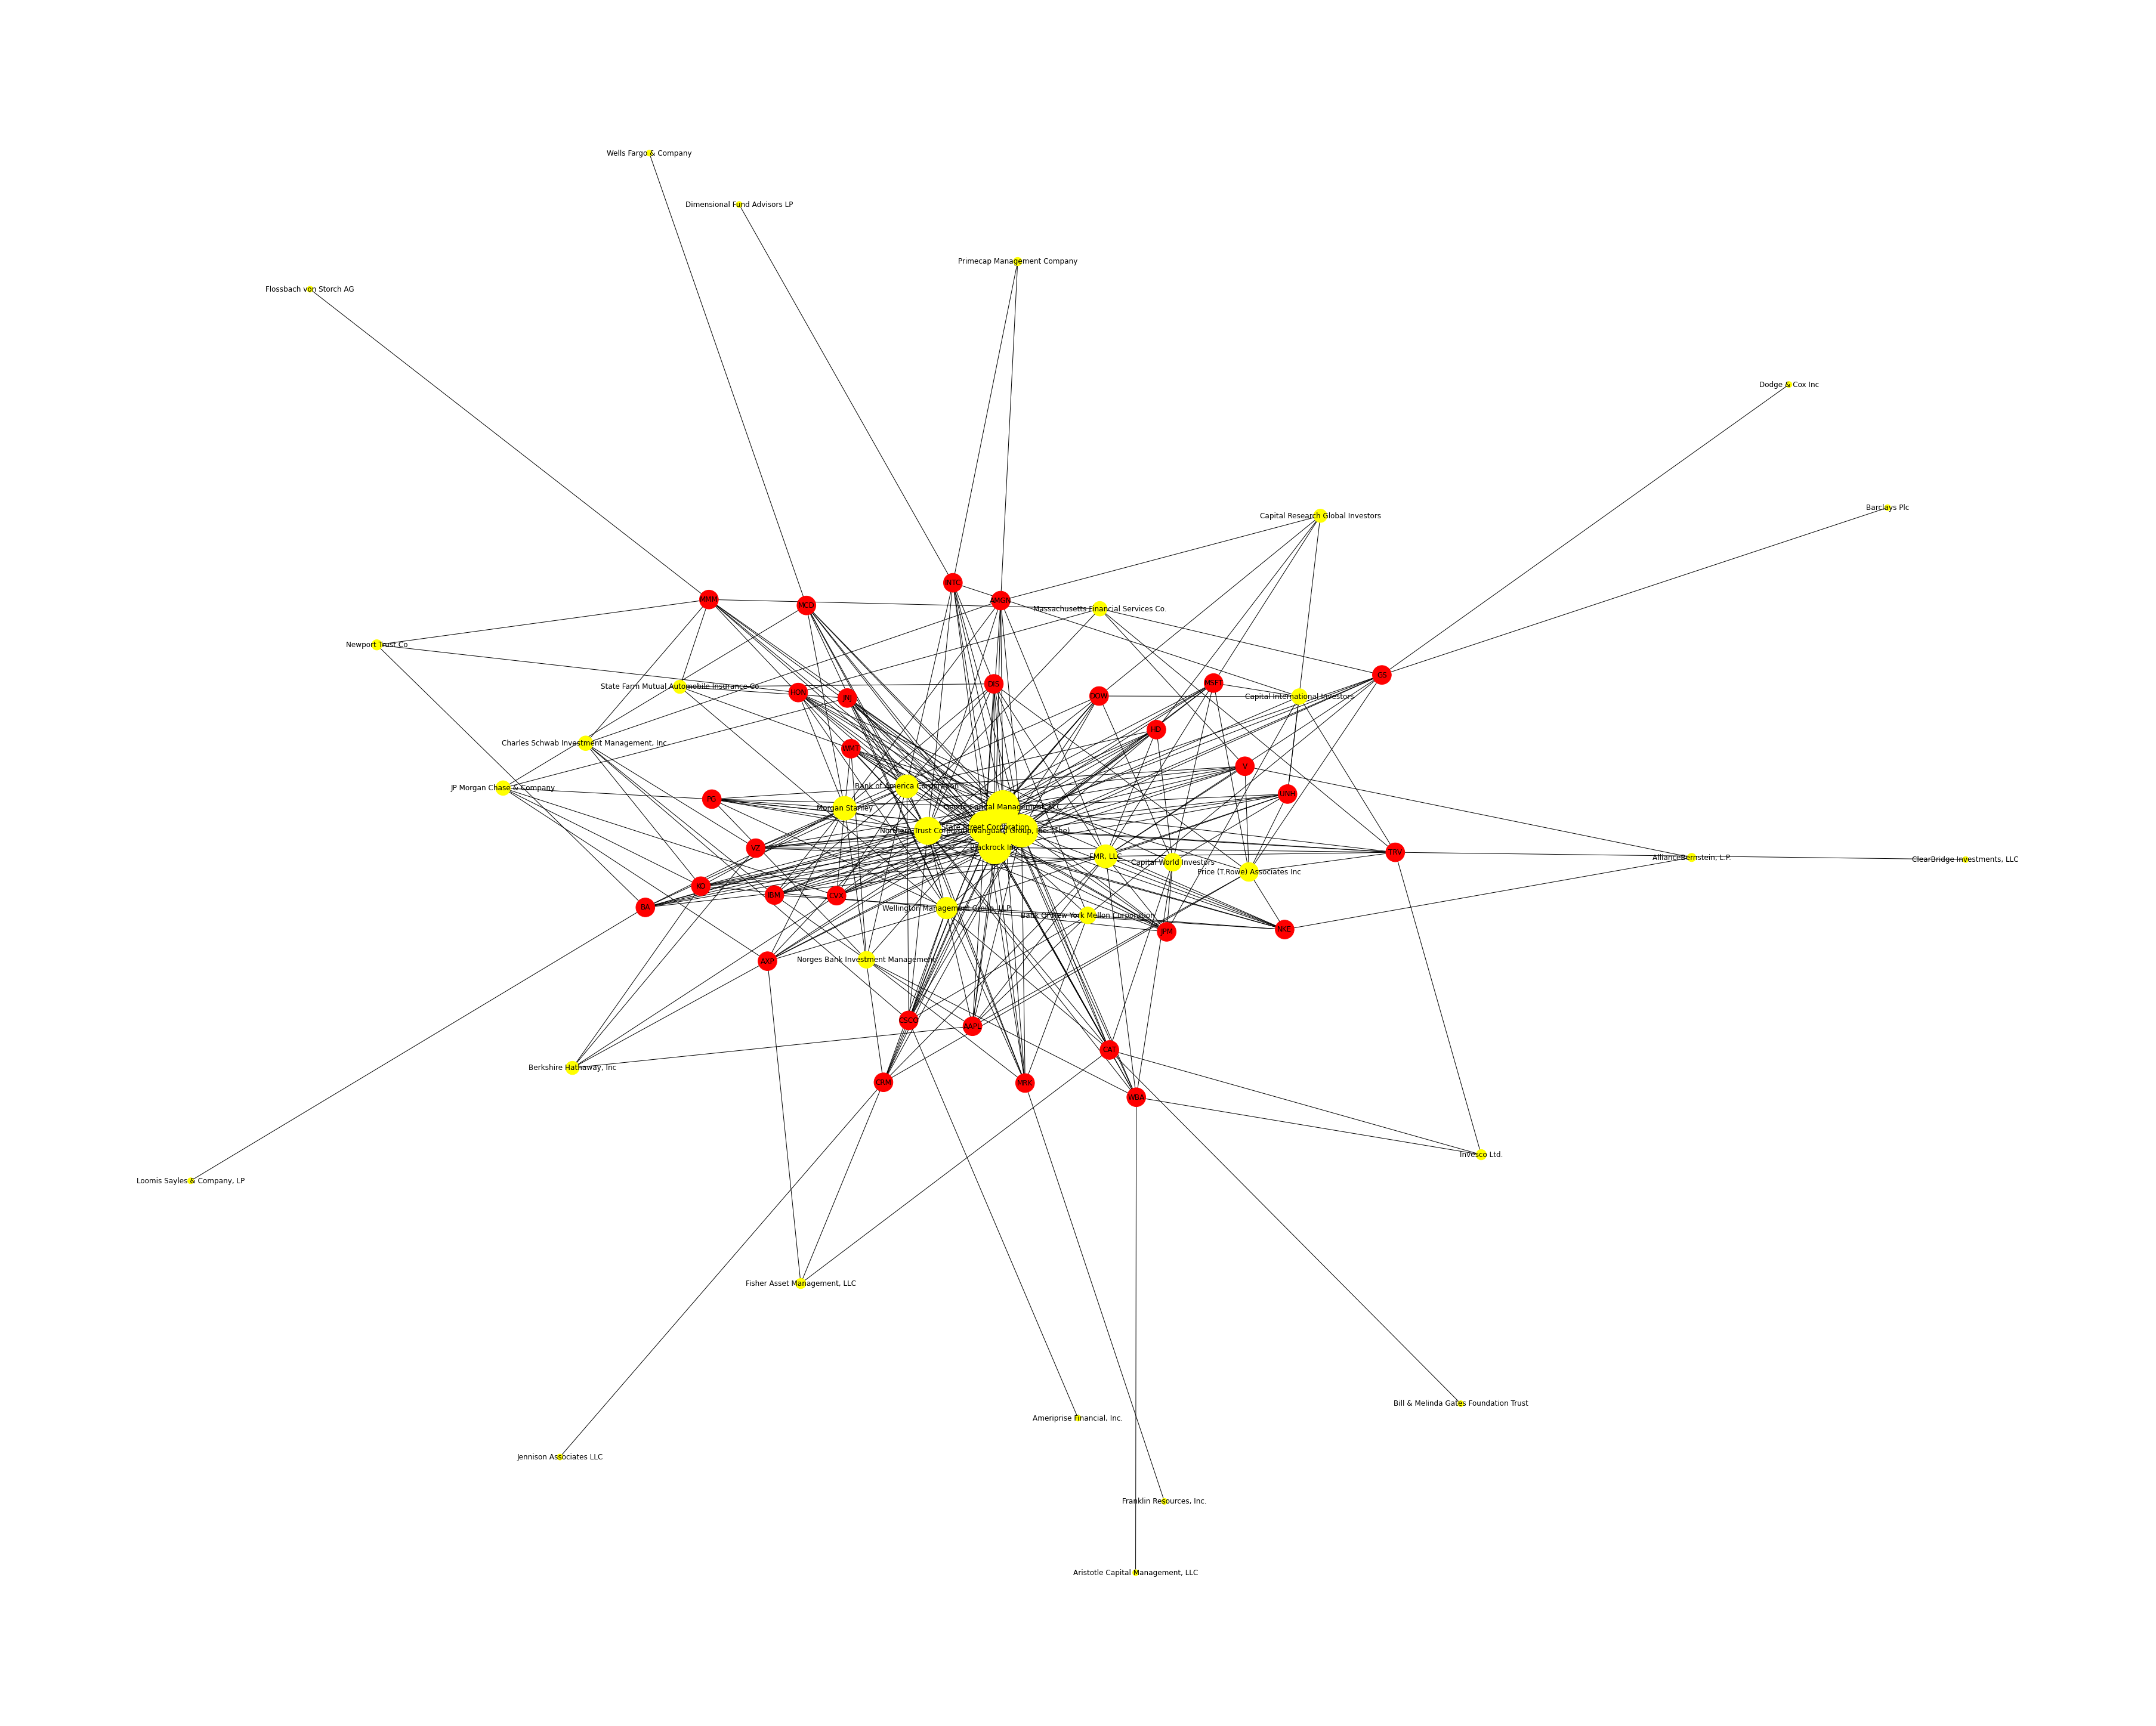

In [31]:
plt.figure(figsize = (50,40))
nx.draw(G,with_labels= True,
        node_color=colors,
        node_size = [v * 100 for v in dict(G.degree()).values()])

In [32]:
G = nx.from_pandas_edgelist(tog_,'Holder','comp',edge_attr = True) 

In [33]:
edgelist = nx.to_edgelist(G)

In [34]:
[v[2]["Value"]/ 50_000_000_000 for v in edgelist]

[4.47924358324,
 4.14312649702,
 3.62175426744,
 3.15057320646,
 2.24844548464,
 1.25081774372,
 0.9388193412,
 0.7924906199,
 0.6778770761,
 0.51387314354,
 0.5045701376,
 3.49124128852,
 2.03501762764,
 1.44871342004,
 0.8684261185,
 1.37351003488,
 0.59468774366,
 0.72455298974,
 0.6246685394,
 0.6120050757]

In [35]:
G.edges()

EdgeView([('Vanguard Group, Inc. (The)', 'AAPL'), ('Vanguard Group, Inc. (The)', 'MSFT'), ('AAPL', 'Blackrock Inc.'), ('AAPL', 'Berkshire Hathaway, Inc'), ('AAPL', 'State Street Corporation'), ('AAPL', 'FMR, LLC'), ('AAPL', 'Geode Capital Management, LLC'), ('AAPL', 'Price (T.Rowe) Associates Inc'), ('AAPL', 'Northern Trust Corporation'), ('AAPL', 'Bank Of New York Mellon Corporation'), ('AAPL', 'Norges Bank Investment Management'), ('Blackrock Inc.', 'MSFT'), ('State Street Corporation', 'MSFT'), ('FMR, LLC', 'MSFT'), ('Geode Capital Management, LLC', 'MSFT'), ('Price (T.Rowe) Associates Inc', 'MSFT'), ('Northern Trust Corporation', 'MSFT'), ('MSFT', 'Capital World Investors'), ('MSFT', 'Capital Research Global Investors'), ('MSFT', 'Capital International Investors')])

In [36]:
colors = []

for node in G:
    if node in all_tog["comp"].values:
        colors.append("red")
    else:
        colors.append("yellow")

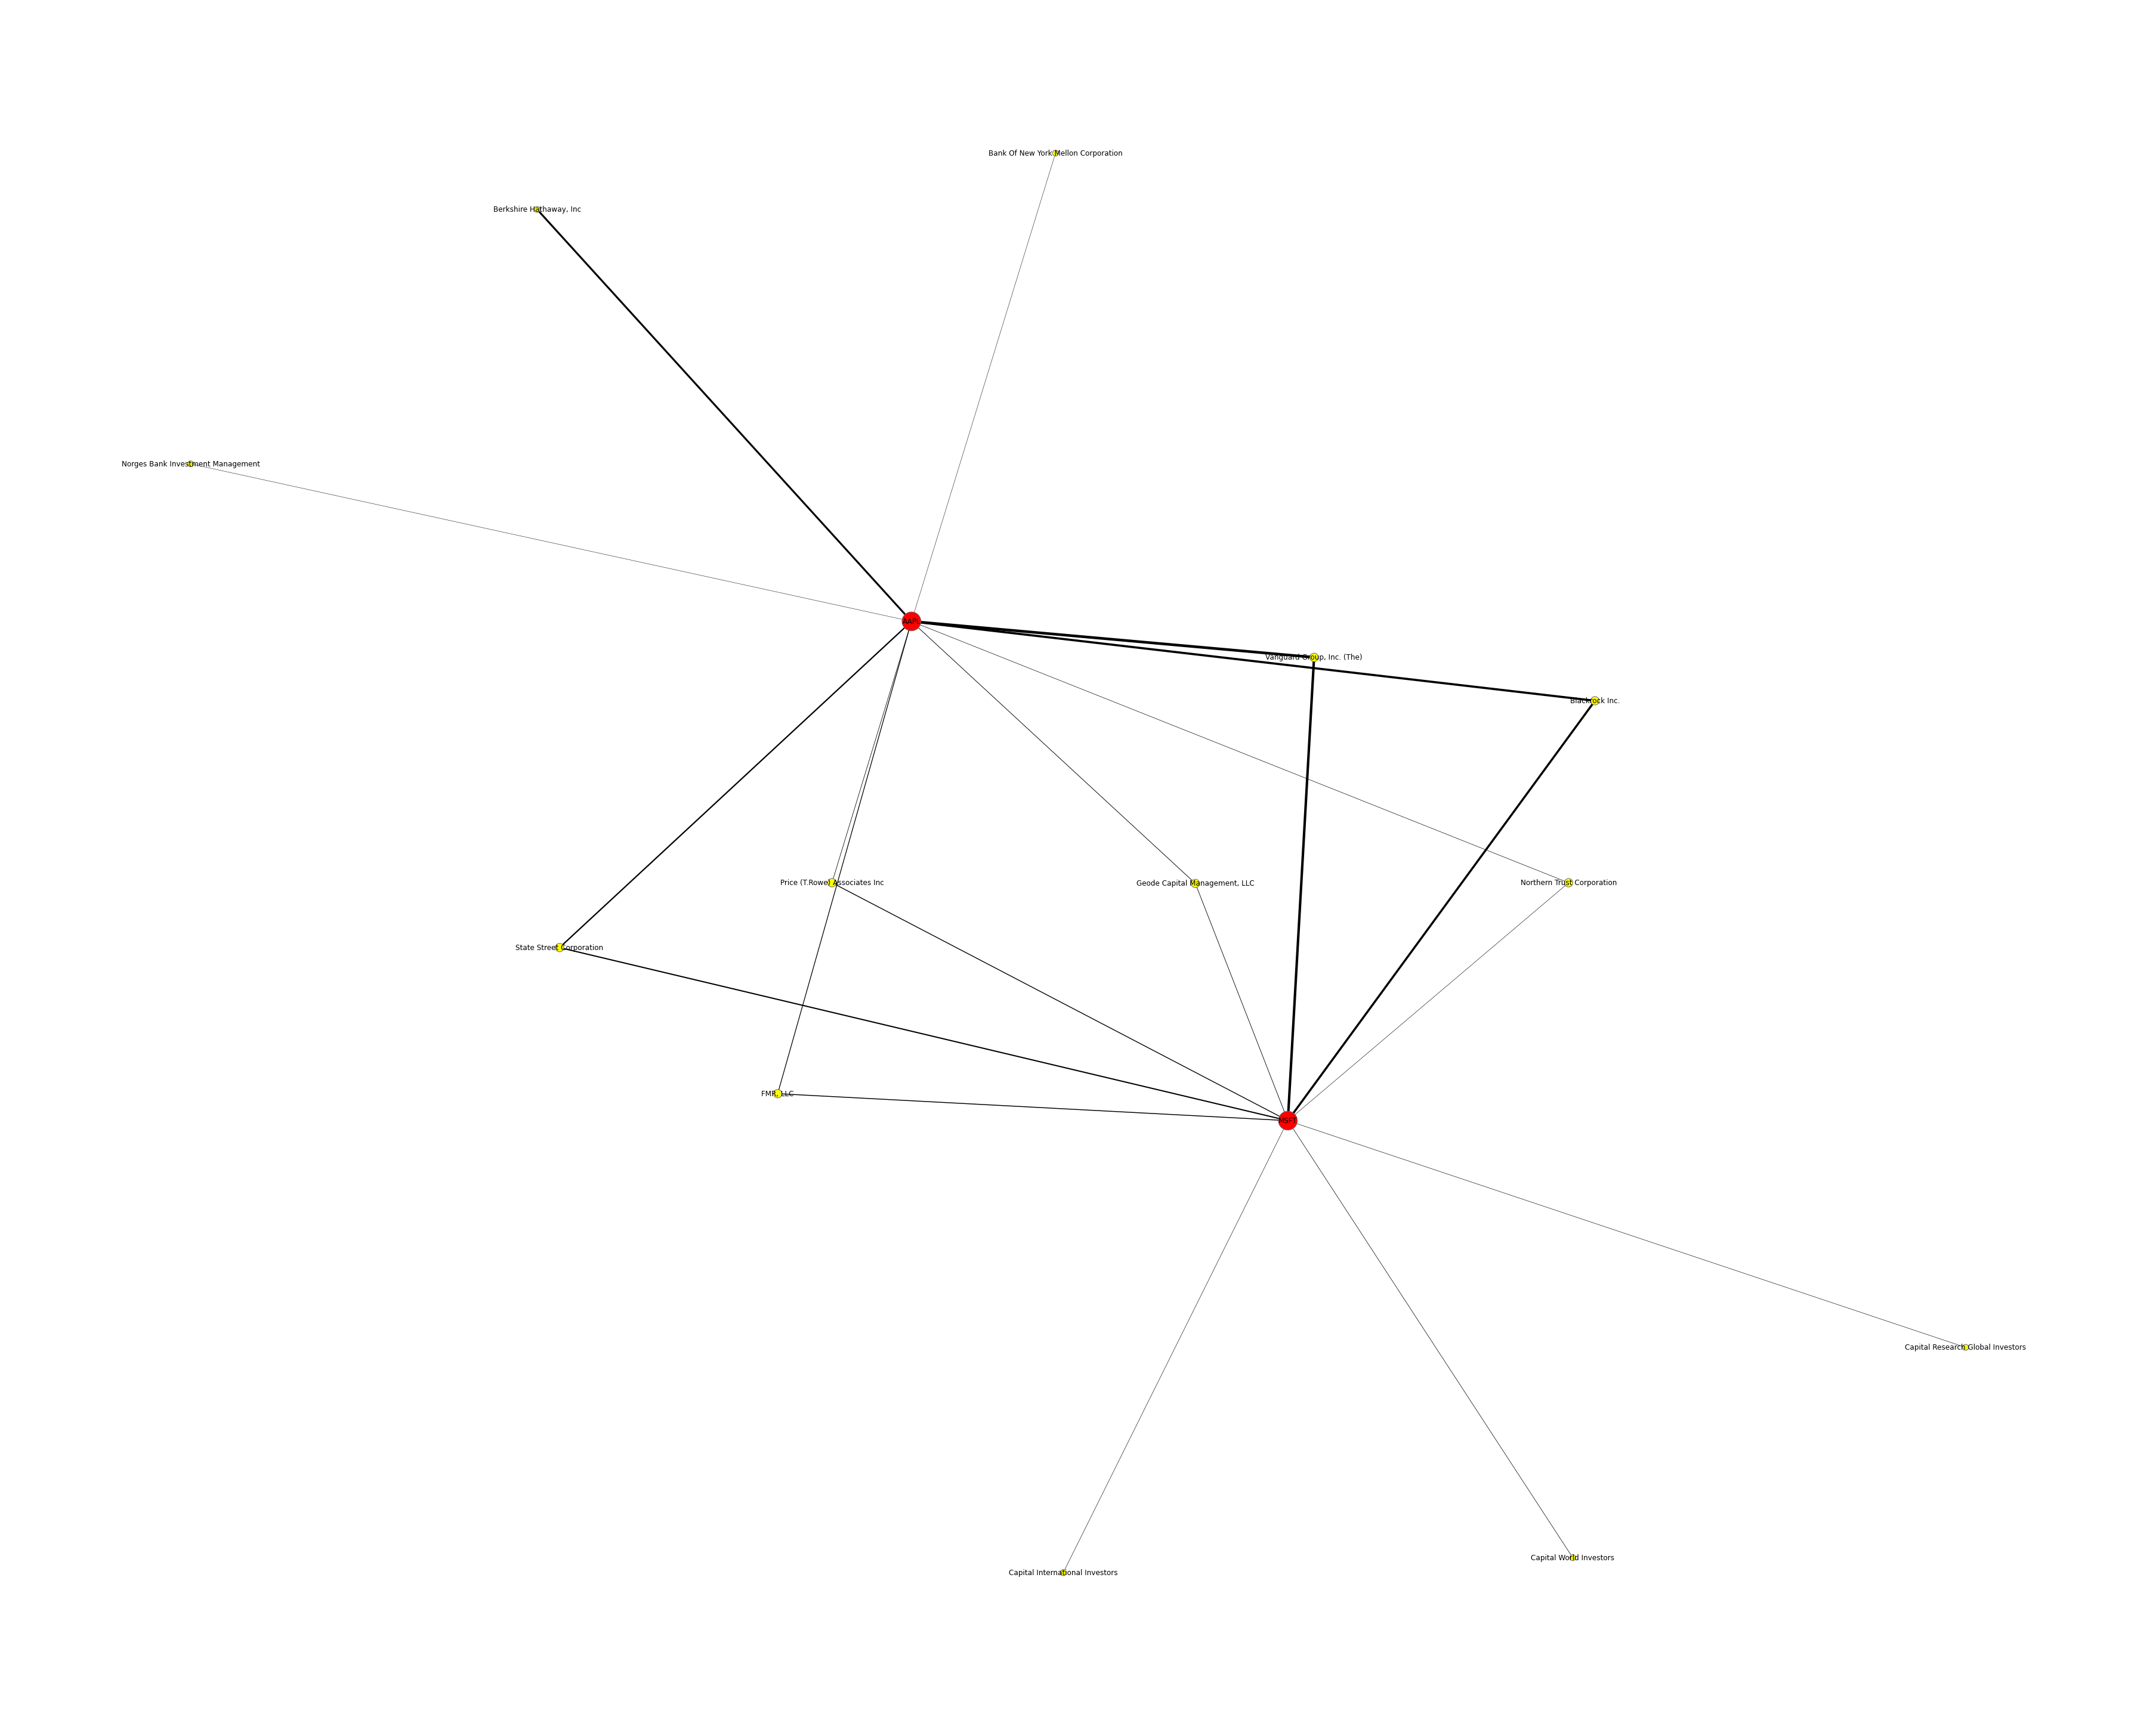

In [37]:
plt.figure(figsize = (50,40))
nx.draw(G,with_labels= True,
        node_color=colors,
        node_size = [v * 100 for v in dict(G.degree()).values()],
        width = [v[2]["Value"]/ 50_000_000_000 for v in edgelist])
ax = plt.gca()
ax.collections[0].set_edgecolor("#696969")